# Вариант 13 10.1.13, 10.2.7, 10.4.13, 10.5.13, 10.6.13

## 10.1.13

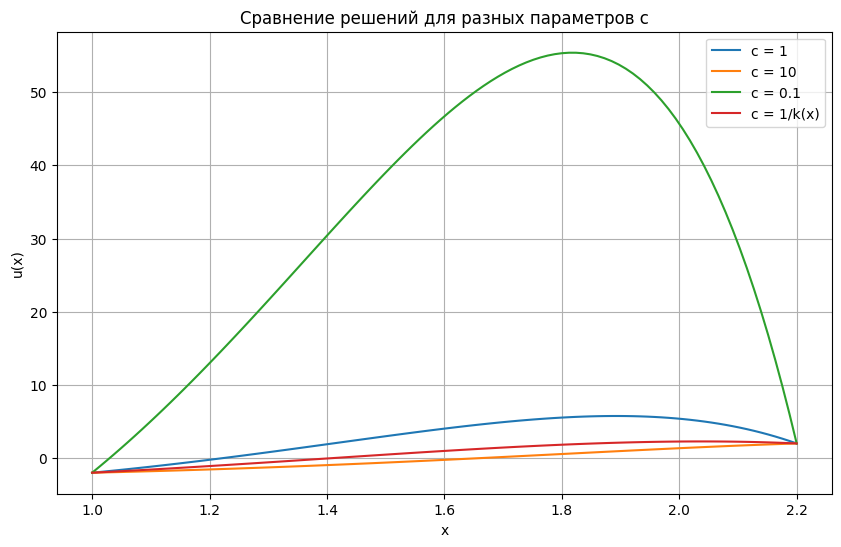

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Определяем символы
x = sp.symbols('x')
u = sp.Function('u')(x)
c = sp.symbols('c')
UA, UB = -2, 2
a, b = 1, 2.2

# Функции для задачи
k_x = x**(-2)
f_x = 6*x**2 - 3*x

# Уравнение для теплопроводности
K_x = c * k_x
eq = sp.Eq(-sp.diff(K_x * sp.diff(u, x), x), f_x)

# Решение для разных параметров c
solutions = {}

# Наборы параметров (1, 10, 0.1)
c_values = [1, 10, 0.1]
for c_val in c_values:
    sol = sp.dsolve(eq.subs(c, c_val), u)
    C1, C2 = sp.symbols('C1 C2')
    
    # Применение граничных условий u(1) = UA, u(2.2) = UB
    constants = sp.solve([sol.subs(x, a).rhs - UA, sol.subs(x, b).rhs - UB], [C1, C2])
    u_sol = sol.subs(constants)
    solutions[c_val] = u_sol

# Решение для c = 1/k(x) = x^2
c_val = 1 / k_x
sol = sp.dsolve(eq.subs(c, c_val), u)
constants = sp.solve([sol.subs(x, a).rhs - UA, sol.subs(x, b).rhs - UB], [C1, C2])
u_sol = sol.subs(constants)
solutions['1/k(x)'] = u_sol

# Визуализация решений
x_vals = np.linspace(a, b, 100)
plt.figure(figsize=(10, 6))

for c_val, u_sol in solutions.items():
    u_lambda = sp.lambdify(x, u_sol.rhs, 'numpy')
    plt.plot(x_vals, u_lambda(x_vals), label=f'c = {c_val}')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Сравнение решений для разных параметров c')
plt.legend()
plt.grid(True)
plt.show()


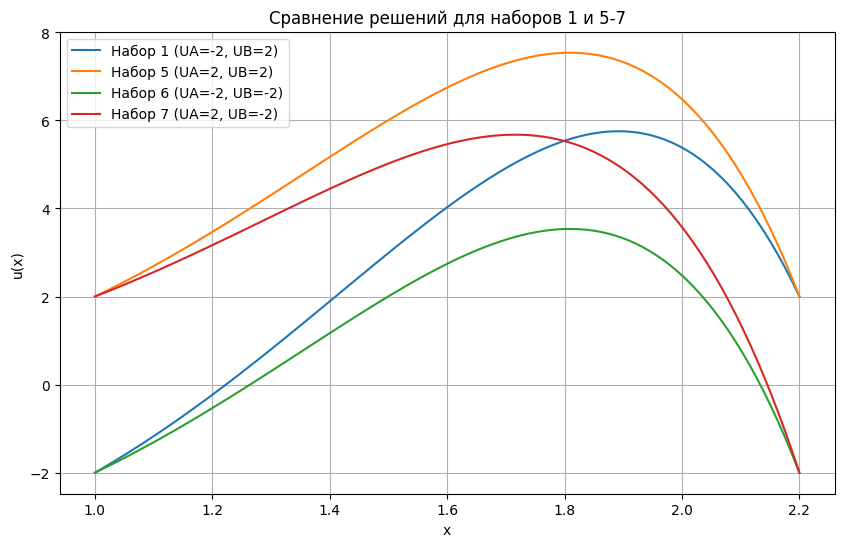

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Определяем символы
x = sp.symbols('x')
u = sp.Function('u')(x)
c = sp.symbols('c')
UA, UB = -2, 2
a, b = 1, 2.2

# Функции для задачи
k_x = x**(-2)
f_x = 6*x**2 - 3*x

# Уравнение для теплопроводности
K_x = c * k_x
eq = sp.Eq(-sp.diff(K_x * sp.diff(u, x), x), f_x)

# Решение для параметра c = 1 (стандартный случай)
sol = sp.dsolve(eq.subs(c, 1), u)
C1, C2 = sp.symbols('C1 C2')

def apply_boundary_conditions(UA_val, UB_val):
    """ Применяет граничные условия и возвращает решение """
    constants = sp.solve([sol.subs(x, a).rhs - UA_val, sol.subs(x, b).rhs - UB_val], [C1, C2])
    return sol.subs(constants)

# Решение для наборов 1-3 (c = 1)
solutions_standard = {
    "Набор 1 (UA=-2, UB=2)": apply_boundary_conditions(UA, UB),
}

# Решение для наборов 5-7 с изменёнными граничными условиями
solutions_modified = {
    "Набор 5 (UA=2, UB=2)": apply_boundary_conditions(-UA, UB),
    "Набор 6 (UA=-2, UB=-2)": apply_boundary_conditions(UA, -UB),
    "Набор 7 (UA=2, UB=-2)": apply_boundary_conditions(-UA, -UB),
}

# Визуализация решений для наборов 1 и 5-7
x_vals = np.linspace(a, b, 100)

plt.figure(figsize=(10, 6))

# Строим графики для стандартного набора 1
for label, u_sol in solutions_standard.items():
    u_lambda = sp.lambdify(x, u_sol.rhs, 'numpy')
    plt.plot(x_vals, u_lambda(x_vals), label=label)

# Строим графики для наборов 5-7
for label, u_sol in solutions_modified.items():
    u_lambda = sp.lambdify(x, u_sol.rhs, 'numpy')
    plt.plot(x_vals, u_lambda(x_vals), label=label)

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Сравнение решений для наборов 1 и 5-7')
plt.legend()
plt.grid(True)
plt.show()


## 10.2.7

Шаг: 0.05000, Разница: 0.03476
Шаг: 0.02500, Разница: 0.00889


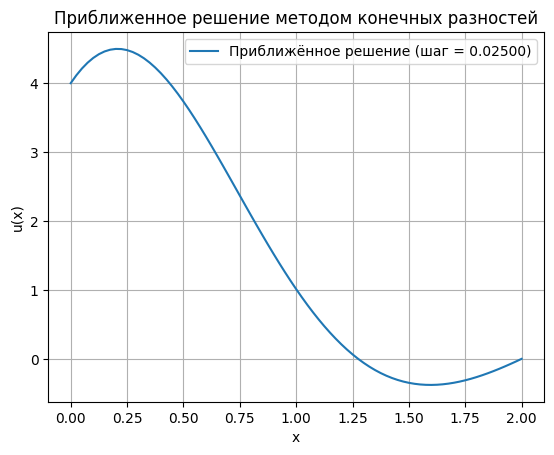

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры задачи
a, b = 0, 2
UA, UB = 4, 0
eps = 0.01

# Определяем функции p(x), q(x), f(x)
def p(x):
    return np.log(1 + x**2)

def q(x):
    return np.exp(-x) * (8 + x**2)

def f(x):
    return 8 - x**2

# Метод конечных разностей для данной сетки
def finite_difference(h):
    N = int((b - a) / h) + 1
    x = np.linspace(a, b, N)
    
    A = np.zeros((N, N))  # Матрица коэффициентов
    B = np.zeros(N)       # Правая часть
    
    # Внутренние узлы
    for i in range(1, N-1):
        xi = x[i]
        A[i, i-1] = 1/h**2 - p(xi)/(2*h)
        A[i, i] = -2/h**2 + q(xi)
        A[i, i+1] = 1/h**2 + p(xi)/(2*h)
        B[i] = f(xi)
    
    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    A[-1, -1] = 1
    B[-1] = UB
    
    # Решаем систему линейных уравнений
    u = np.linalg.solve(A, B)
    
    return x, u

# Функция для проверки точности
def calculate_with_accuracy(eps):
    h = 0.1  # Начальный шаг
    x_prev, u_prev = finite_difference(h)
    
    while True:
        h /= 2
        x_new, u_new = finite_difference(h)
        
        # Интерполяция предыдущего решения на новую сетку
        u_prev_interp = np.interp(x_new, x_prev, u_prev)
        
        # Оценка точности
        diff = np.max(np.abs(u_new - u_prev_interp))
        print(f"Шаг: {h:.5f}, Разница: {diff:.5f}")
        
        if diff < eps:
            break
        
        x_prev, u_prev = x_new, u_new
    
    return x_new, u_new, h

# Получаем решение с заданной точностью
x_approx, u_approx, final_h = calculate_with_accuracy(eps)

# Построение графика приближённого решения
plt.plot(x_approx, u_approx, label=f"Приближённое решение (шаг = {final_h:.5f})")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Приближенное решение методом конечных разностей')
plt.grid(True)
plt.legend()
plt.show()


## 10.4.13

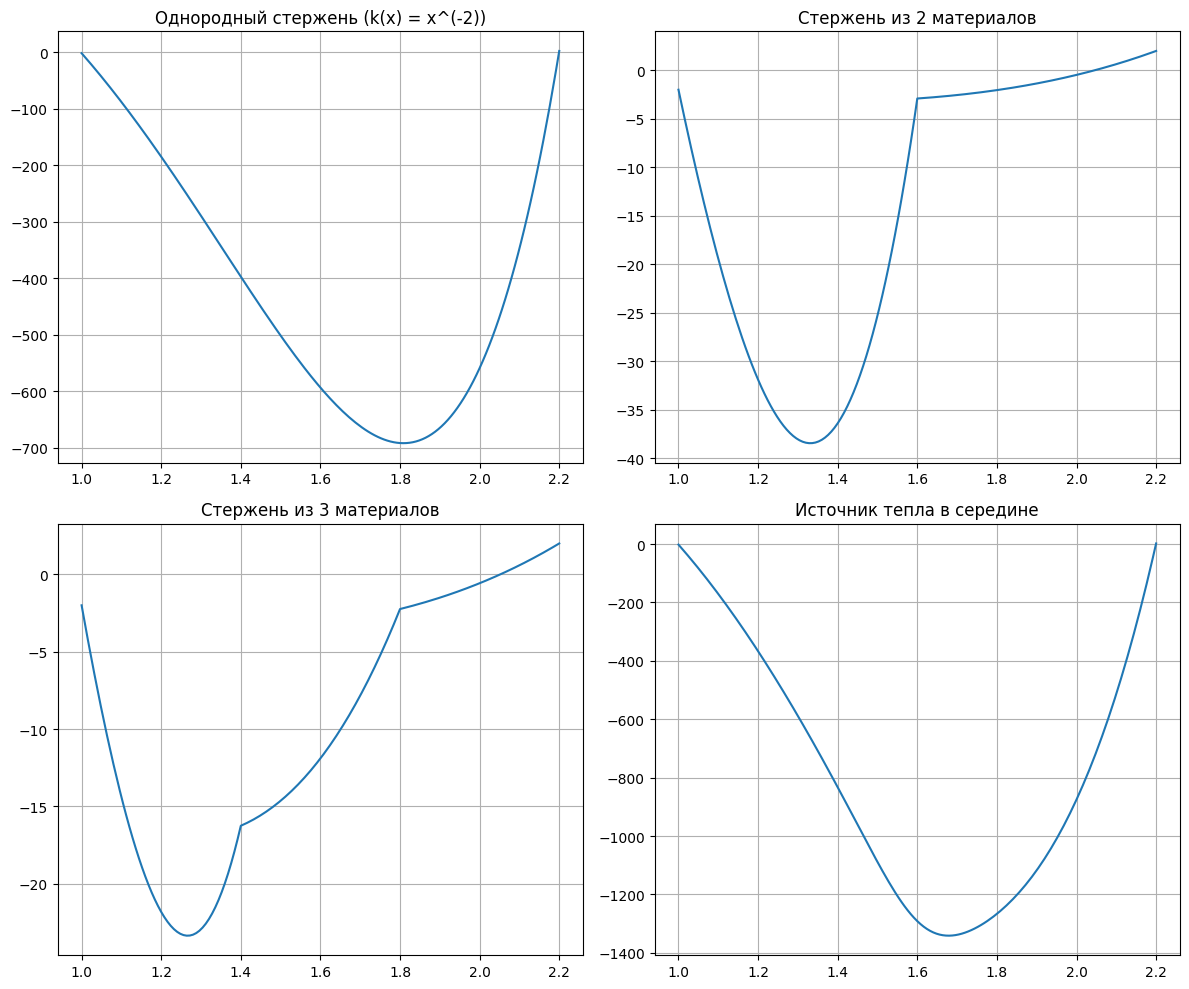

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Задаём параметры задачи
a, b = 1, 2.2
UA, UB = -2, 2
h = (b - a) / 150
N = int((b - a) / h) + 1
x_vals = np.linspace(a, b, N)

# Функция источника тепла f(x)
def f(x):
    return 6 * x**2 - 3 * x

# Вариант 1: k(x) = x^(-2) для всего стержня
def k1(x):
    return x**(-2)

# Вариант 2: k(x) для двух материалов
def k2(x, k1, k2):
    mid_point = 0.5 * (b + a)
    if a <= x <= mid_point:
        return k1
    else:
        return k2

# Вариант 3: k(x) для трёх материалов
def k3(x, k1, k2, k3):
    third_point_1 = a + (b - a) / 3
    third_point_2 = a + 2 * (b - a) / 3
    if a <= x <= third_point_1:
        return k1
    elif third_point_1 < x <= third_point_2:
        return k2
    else:
        return k3

# Вариант 4: Источник тепла (дельта-функция)
def f_with_source(x, source_pos, source_strength):
    return f(x) + source_strength * np.exp(-100 * (x - source_pos)**2)

# Разностная схема для данной k(x)
def finite_difference(k, f_func=f, k_type='one_material', k_params=None):
    A = np.zeros((N, N))  # Матрица коэффициентов
    B = np.zeros(N)       # Правая часть

    # Заполнение матрицы и правой части
    for i in range(1, N-1):
        xi = x_vals[i]
        xi_prev = x_vals[i-1]
        xi_next = x_vals[i+1]
        
        h_prev = xi - xi_prev
        h_next = xi_next - xi
        
        if k_type == 'one_material':
            k_prev = k((xi + xi_prev) / 2)
            k_next = k((xi + xi_next) / 2)
        elif k_type == 'two_materials':
            k_prev = k2((xi + xi_prev) / 2, *k_params)
            k_next = k2((xi + xi_next) / 2, *k_params)
        elif k_type == 'three_materials':
            k_prev = k3((xi + xi_prev) / 2, *k_params)
            k_next = k3((xi + xi_next) / 2, *k_params)
        
        A[i, i-1] = k_prev / h_prev
        A[i, i] = -(k_prev / h_prev + k_next / h_next)
        A[i, i+1] = k_next / h_next
        B[i] = f_func(xi)

    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    A[-1, -1] = 1
    B[-1] = UB

    # Решаем систему уравнений
    u_vals = np.linalg.solve(A, B)
    return u_vals

# Построение графиков для различных вариантов
def plot_solutions():
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Вариант 1: Однородный стержень (k(x) = x^(-2))
    u1 = finite_difference(k1, k_type='one_material')
    axs[0, 0].plot(x_vals, u1, label='Однородный стержень')
    axs[0, 0].set_title('Однородный стержень (k(x) = x^(-2))')
    axs[0, 0].grid(True)
    
    # Вариант 2: Стержень из 2 материалов
    u2 = finite_difference(k2, k_type='two_materials', k_params=(1, 100))
    axs[0, 1].plot(x_vals, u2, label='2 материала (k1=1, k2=100)')
    axs[0, 1].set_title('Стержень из 2 материалов')
    axs[0, 1].grid(True)

    # Вариант 3: Стержень из 3 материалов
    u3 = finite_difference(k3, k_type='three_materials', k_params=(1, 10, 100))
    axs[1, 0].plot(x_vals, u3, label='3 материала (k1=1, k2=10, k3=100)')
    axs[1, 0].set_title('Стержень из 3 материалов')
    axs[1, 0].grid(True)

    # Вариант 4: Источник тепла в середине
    u4 = finite_difference(k1, f_func=lambda x: f_with_source(x, (a + b) / 2, 50), k_type='one_material')
    axs[1, 1].plot(x_vals, u4, label='Источник тепла в середине')
    axs[1, 1].set_title('Источник тепла в середине')
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Запуск программы и построение графиков
plot_solutions()


## 10.5.13

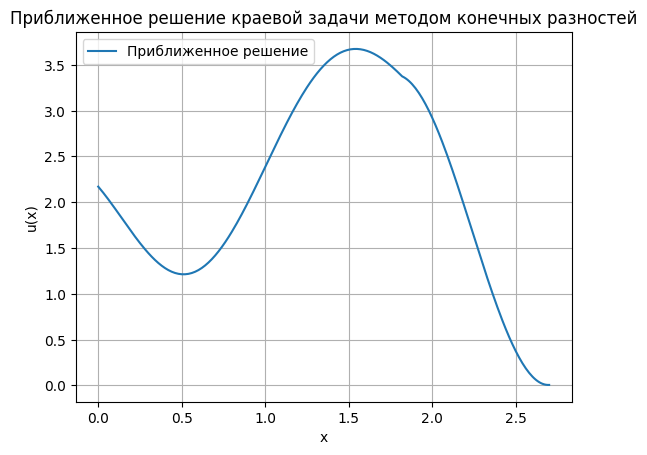

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Задаём параметры задачи
a, b, c = 0, 2.7, 1.815
h = 0.01  # шаг сетки
N = int((b - a) / h) + 1
x_vals = np.linspace(a, b, N)

# Задаём функции k(x), q(x) и f(x)
def k(x):
    if a <= x <= c:
        return 0.5
    elif c < x <= b:
        return 1.2
    else:
        return 0  # если значение x вне диапазона, возвращаем 0 или другое значение по умолчанию

def q(x):
    if a <= x <= c:
        return 5.6
    elif c < x <= b:
        return 12.3

def f(x):
    return 9 * (x + 1 / (1 + x**3))

# Разностная схема второго порядка точности
def finite_difference():
    A = np.zeros((N, N))  # Матрица коэффициентов
    B = np.zeros(N)       # Правая часть

    # Заполнение матрицы и правой части для внутренних точек
    for i in range(1, N-1):
        xi = x_vals[i]
        xi_prev = x_vals[i-1]
        xi_next = x_vals[i+1]

        h_prev = xi - xi_prev
        h_next = xi_next - xi
        
        k_prev = k((xi + xi_prev) / 2)
        k_next = k((xi + xi_next) / 2)
        
        A[i, i-1] = k_prev / h_prev**2
        A[i, i] = -(k_prev / h_prev**2 + k_next / h_next**2) + q(xi)
        A[i, i+1] = k_next / h_next**2
        B[i] = f(xi)

    # Граничные условия в точке a
    A[0, 0] = -k(x_vals[0]) / h + 0.5
    A[0, 1] = k(x_vals[0]) / h
    B[0] = 0  # Левая граница

    # Граничные условия в точке b
    A[-1, -2] = -k(x_vals[-1]) / h
    A[-1, -1] = k(x_vals[-1]) / h + 0.5
    B[-1] = 0  # Правая граница

    # Решаем систему уравнений методом прогонки
    u_vals = np.linalg.solve(A, B)
    return u_vals

# Решение задачи
u_vals = finite_difference()

# Построение графика
plt.plot(x_vals, u_vals, label='Приближенное решение')
plt.title('Приближенное решение краевой задачи методом конечных разностей')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()


## 10.6.13

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_12836\2317920802.py:36: RuntimeWarning: overflow encountered in scalar divide
  (k_iphalf * (u[n, i+1] - u[n, i]) - k_imhalf * (u[n, i] - u[n, i-1])) / h**2
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_12836\2317920802.py:35: RuntimeWarning: invalid value encountered in scalar add
  u[n+1, i] = u[n, i] + tau * (


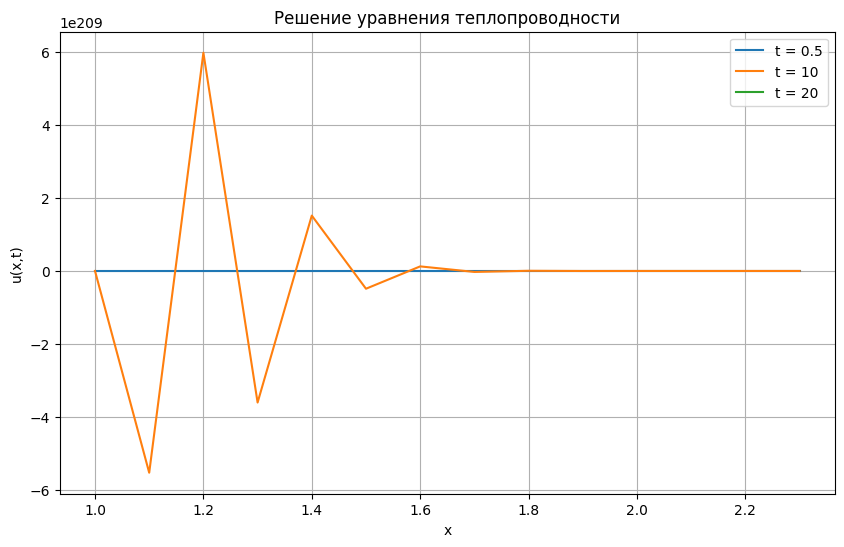

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
a, b = 1, 2.2
UA, UB = -2, 2
T = 20  # конечное время
tau = 0.05  # шаг по времени
h = 0.1  # шаг по пространству
x_vals = np.arange(a, b+h, h)
N = len(x_vals)
time_vals = np.arange(0, T+tau, tau)
M = len(time_vals)

# Функции теплопроводности, источника и начальной температуры
def k(x):
    return x**(-2)

def f(x):
    return 6 * x**2 - 3 * x

def phi(x):
    return np.sin(np.pi * (x - a) / (b - a))  # начальная температура, можно изменить

# Разностная схема
def solve_heat_eq():
    u = np.zeros((M, N))  # массив решений, строки — время, столбцы — x
    u[0, :] = phi(x_vals)  # начальное условие

    for n in range(M-1):
        for i in range(1, N-1):
            k_iphalf = k((x_vals[i] + x_vals[i+1]) / 2)
            k_imhalf = k((x_vals[i] + x_vals[i-1]) / 2)
            
            u[n+1, i] = u[n, i] + tau * (
                (k_iphalf * (u[n, i+1] - u[n, i]) - k_imhalf * (u[n, i] - u[n, i-1])) / h**2
                + f(x_vals[i]) * (1 - np.exp(-time_vals[n])))

        # Граничные условия
        u[n+1, 0] = UA
        u[n+1, -1] = UB

    return u

# Решение задачи
u_vals = solve_heat_eq()

# Построение графиков для t = 0.5, t = 10, t = 20
plt.figure(figsize=(10, 6))

for t_plot in [0.5, 10, 20]:
    idx = int(t_plot / tau)
    plt.plot(x_vals, u_vals[idx, :], label=f't = {t_plot}')

plt.title('Решение уравнения теплопроводности')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.grid(True)
plt.legend()
plt.show()
